In [4]:
import numpy as np
import skimage as ski
import skimage.io
import matplotlib.pyplot as plt
import tensorflow as tf

(431, 600, 3)


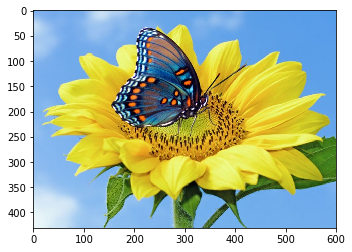

In [19]:
img = (ski.io.imread("/Users/abulbasar/Downloads/flower.jpg")/255.0)
img = img.astype(np.float32)
plt.imshow(img, cmap="gray")
print(img.shape)

In [20]:
img.dtype

dtype('float32')

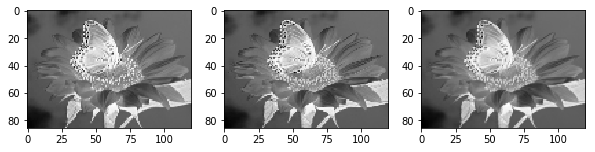

In [21]:
num_filters = 3
channels = 3
shape = [1] + list(img.shape)

X = tf.constant(img.reshape(shape))

filters = np.zeros(shape=(5, 5, channels, num_filters), dtype=np.float32)
filters[:, 2, :, 0] = 1  # vertical line
filters[2, :, :, 1] = 1  # horizontal line
filters[:, :, :, 2] = 1

X = tf.nn.conv2d(X, filters, strides=[1,5,5,1], padding="VALID")

with tf.Session() as sess:
    out = sess.run(X)[0]

    fig, _ = plt.subplots(1, num_filters, figsize = (10, 8))
    for i, ax in enumerate(fig.axes):
        ax.imshow(out[:, :, i], cmap="Greys")

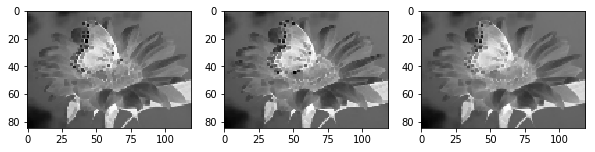

In [24]:
num_filters = 3
shape = [1] + list(img.shape)

X = tf.constant(img.reshape(shape))

filters = np.zeros(shape=(5, 5, 3, num_filters), dtype=np.float32)
filters[:, 2, :, 0] = 1  # vertical line
filters[2, :, :, 1] = 1  # horizontal line
filters[:, :, :, 2] = 1

X = tf.nn.conv2d(X, filters, strides=[1,5,5,1], padding="VALID")
X = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,1,1,1],padding="VALID")

with tf.Session() as sess:
    out = sess.run(X)[0]

    fig, _ = plt.subplots(1, num_filters, figsize = (10, 8))
    for i, ax in enumerate(fig.axes):
        ax.imshow(out[:, :, i], cmap="Greys")